In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

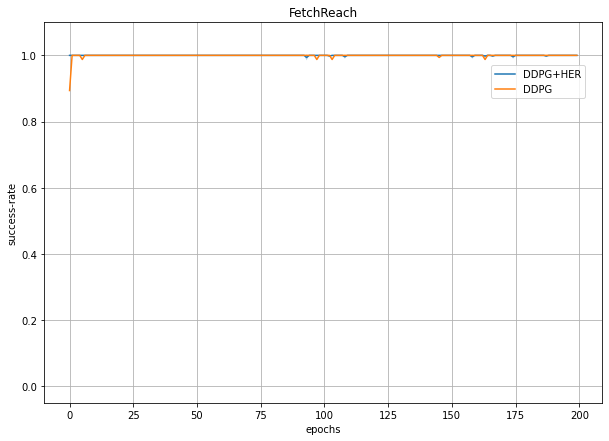

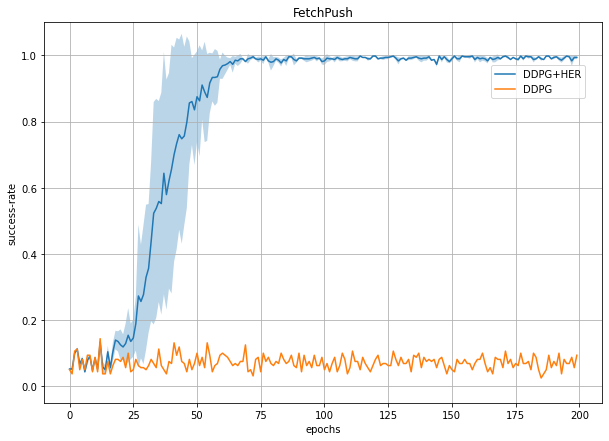

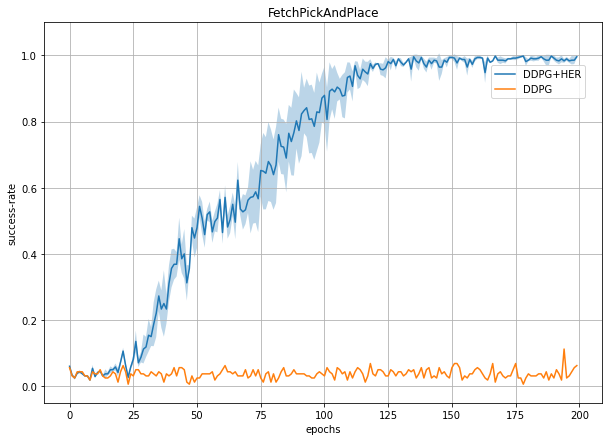

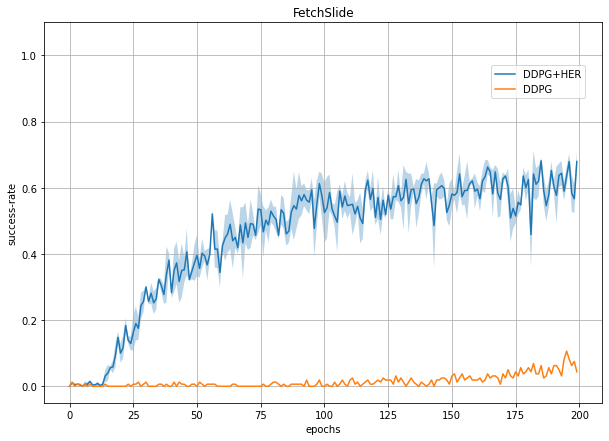

In [2]:
envs = ['Reach', 'Push', 'PickAndPlace', 'Slide']

for env in envs:

    df1 = np.array(pd.read_csv('./trained/'+env+'/seed0/scores_Fetch'+env+'-v1_0.csv', header=None)).flatten()
    df2 = np.array(pd.read_csv('./trained/'+env+'/seed1/scores_Fetch'+env+'-v1_1.csv', header=None)).flatten()
    df3 = np.array(pd.read_csv('./trained/'+env+'/seed2/scores_Fetch'+env+'-v1_2.csv', header=None)).flatten()

    noHER = np.array(pd.read_csv('./trained/'+env+'/noHER/scores_Fetch'+env+'-v1_0.csv', header=None)).flatten()


    mean = (df1 + df2 + df3) / 3
    std = np.std((df1, df2, df3), axis=0)

    epochs = range(len(mean))
    
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(epochs, mean, label='DDPG+HER')
    ax.plot(epochs, noHER, label='DDPG')
    ax.fill_between(epochs, mean-std, mean+std, alpha=0.3)
    plt.ylim(-0.05,1.1)
    plt.legend(loc=(0.8,0.8))    
    plt.grid()
    plt.title('Fetch'+env)
    plt.xlabel('epochs')
    plt.ylabel('success-rate')
    plt.savefig(env+'.svg', format='svg', dpi=1200)
    plt.show()